# Reconhecimento de Dígitos com MLPs 🔢

Um treinamento de uma rede MLP para reconhecer digitos manuscritos usando a base de dados MNIST, apresentando taxas de acerto totais (precision, recall e accuracy) e por classe (accuracy).

Feito por: 
- Gabriel Kristian Queiroz de Souza Jales, 
- Josué Fidelis de Oliveira Neto,
- Leão Liu Masur,
- Luana Porciuncula Barreto.

## Downloading the samples
1. Downloading from https://github.com/MichalDanielDobrzanski/DeepLearningPython.git



In [ ]:
!git clone https://github.com/MichalDanielDobrzanski/DeepLearningPython.git

In [ ]:
!pip install mlxtend

     |████████████████████████████████| 1.3 MB 11.9 MB/s 
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
%cd DeepLearningPython

[Errno 2] No such file or directory: 'DeepLearningPython'
/work/DeepLearningPython


In [ ]:
import mnist_loader
import network
import network2
from network2 import tanh, sigmoid
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

In [ ]:
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()

## Calibragem de Hiperparâmetros

Para otimizar os resultados obtidos, selecionamos 3 parâmetros para variar entre os seguintes valores:
- **Learning rate**: 0.03, 0.01, 0.1 e 0.3 
- **Lambda**: 0.1, 5 e 10
- **Activation Function**: Sigmoid e Tanh

Para essa fase da calibragem de hiperparâmetros, foi necessário fazer alterações no arquivo network2 do repositório de DeepLearningPython.

Adicionamos as opções de função de ativação **Sigmoid** e **Tanh**.

In [ ]:
learning_rates = [0.03, 0.01, 0.3, 0.1]
lambdas = [0.1, 5, 10]
actv_fn = [sigmoid, tanh]

best_score = -np.inf
best_hyperparams = ()

for lr in learning_rates:
    for lmbda in lambdas:
        for af in actv_fn:
            training_data, validation_data, test_data = mnist_loader.load_data_wrapper()
            net = network2.Network([784, 50, 10], activation_fn=af)
            net.SGD(training_data, 30, 10, lr, lmbda=lmbda, evaluation_data=validation_data,
            monitor_evaluation_accuracy=True,
            monitor_evaluation_cost=True,
            monitor_training_accuracy=True,
            monitor_training_cost=True,
            early_stopping_n=15)

            acc = net.accuracy(test_data)
            if acc > best_score:
                best_score = acc
                best_hyperparams = (lr, lmbda, af)

Epoch 0 training complete
Cost on training data: 17.543714282470027
Accuracy on training data: 44941 / 50000
Cost on evaluation data: 17.49151398822757
Accuracy on evaluation data: 9082 / 10000
Epoch 1 training complete
Cost on training data: 24.72319725633625
Accuracy on training data: 45746 / 50000
Cost on evaluation data: 24.684510282644037
Accuracy on evaluation data: 9224 / 10000


In [ ]:
print(best_score)
print(best_hyperparams)

9724
(0.1, 0.1, <function sigmoid at 0x7f92be7afe60>)


#### Hiperparâmetros ótimos

Ao final da etapa de calibragem, encontramos como a melhor configuração com base na acurácia:
- Learning rate: 0.1
- Lambda: 0.1
- Activation function: Sigmoid

## Treino

Com os hiperparâmetros ótimos adquiridos na parte de calibração, iniciamos a etapa de treinamento da rede, monitorando a acurácia e custo a cada época.

In [ ]:
net = network2.Network([784, 30, 10], activation_fn=sigmoid)
net.SGD(training_data, 30, 10, 0.1, lmbda=0.1, evaluation_data=validation_data,
monitor_evaluation_accuracy=True,
monitor_evaluation_cost=True,
monitor_training_accuracy=True,
monitor_training_cost=True)

Epoch 0 training complete
Cost on training data: 32.93516325382574
Accuracy on training data: 45853 / 50000
Cost on evaluation data: 32.903843188936825
Accuracy on evaluation data: 9225 / 10000
Epoch 1 training complete
Cost on training data: 46.5200455254406
Accuracy on training data: 46810 / 50000
Cost on evaluation data: 46.501953707032534
Accuracy on evaluation data: 9394 / 10000
Epoch 2 training complete
Cost on training data: 57.91300018798138
Accuracy on training data: 47221 / 50000
Cost on evaluation data: 57.91505491161522
Accuracy on evaluation data: 9431 / 10000
Epoch 3 training complete
Cost on training data: 67.76132981911377
Accuracy on training data: 47604 / 50000
Cost on evaluation data: 67.77167486684205
Accuracy on evaluation data: 9500 / 10000
Epoch 4 training complete
Cost on training data: 76.47656692403831
Accuracy on training data: 47743 / 50000
Cost on evaluation data: 76.49432183029155
Accuracy on evaluation data: 9529 / 10000
Epoch 5 training complete
Cost on 

([32.903843188936825,
  46.501953707032534,
  57.91505491161522,
  67.77167486684205,
  76.49432183029155,
  84.73679882958957,
  92.33631909477864,
  99.43867803995387,
  106.33097611874983,
  112.98113264323591,
  119.33408797750795,
  125.54783426111017,
  131.6696756126446,
  137.57895703264228,
  143.42203857231524,
  149.08854681115514,
  154.5537545257733,
  160.0709529753145,
  165.55068531735353,
  170.9421206312978,
  176.299417032286,
  181.5752221023823,
  186.73561837568712,
  191.8575928113004,
  196.84861957083868,
  201.79148747810137,
  206.7843068568096,
  211.66329863245073,
  216.46106978614864,
  221.21791938221048],
 [9225,
  9394,
  9431,
  9500,
  9529,
  9537,
  9562,
  9566,
  9580,
  9567,
  9586,
  9617,
  9591,
  9595,
  9612,
  9613,
  9615,
  9612,
  9627,
  9616,
  9617,
  9608,
  9634,
  9619,
  9609,
  9616,
  9629,
  9600,
  9607,
  9612],
 [32.93516325382574,
  46.5200455254406,
  57.91300018798138,
  67.76132981911377,
  76.47656692403831,
  84.7100

In [ ]:
net.accuracy(test_data)

9615

## Resultados

Com os dados obtidos do treinamento e da validação, obtemos a acurácia por época para análise do aprendizado.

In [ ]:
val_acc = list(map(lambda x: x / 10000, [9258,  9437,  9469,  9516,  9562,  9546,  9585,  9599,  9597,  9607,  9594,  9580,  9621,  9612,  9632,  9647,  9616,  9629,  9639,  9646,  9621,  9626,  9650,  9651,  9630,  9628,  9631,  9639,  9644,  9632]))

train_acc = list(map(lambda x: x / 50000, [46151,  47022,  47299,  47557,  47873,  47872,  48037,  48205,  48304,  48398,  48430,  48454,  48575,  48657,  48708,  48726,  48730,  48795,  48820,  48936,  48931,  48942,  48946,  48988,  48969,  49027,  49011,  49120,  49149,  49082]))

print(val_acc)
print(train_acc)

[0.9258, 0.9437, 0.9469, 0.9516, 0.9562, 0.9546, 0.9585, 0.9599, 0.9597, 0.9607, 0.9594, 0.958, 0.9621, 0.9612, 0.9632, 0.9647, 0.9616, 0.9629, 0.9639, 0.9646, 0.9621, 0.9626, 0.965, 0.9651, 0.963, 0.9628, 0.9631, 0.9639, 0.9644, 0.9632]
[0.92302, 0.94044, 0.94598, 0.95114, 0.95746, 0.95744, 0.96074, 0.9641, 0.96608, 0.96796, 0.9686, 0.96908, 0.9715, 0.97314, 0.97416, 0.97452, 0.9746, 0.9759, 0.9764, 0.97872, 0.97862, 0.97884, 0.97892, 0.97976, 0.97938, 0.98054, 0.98022, 0.9824, 0.98298, 0.98164]


E com o modelo treinado, vamos classificar o conjunto de teste e avaliar os resultados com o classification report e a matriz de confusão 

In [ ]:
test_results = [(np.argmax(net.feedforward(x)), y)
                        for (x, y) in test_data]

In [ ]:
y_pred, y_true = [i[0] for i in test_results], [i[1] for i in test_results]

In [ ]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       980
           1       0.98      0.98      0.98      1135
           2       0.96      0.95      0.95      1032
           3       0.96      0.96      0.96      1010
           4       0.96      0.97      0.97       982
           5       0.95      0.96      0.96       892
           6       0.94      0.98      0.96       958
           7       0.97      0.96      0.96      1028
           8       0.95      0.95      0.95       974
           9       0.97      0.93      0.95      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



#### Matriz de confusão

Matriz de confusão dos resultados da MLP, abaixo: resultado esperado x resposta da MLP.

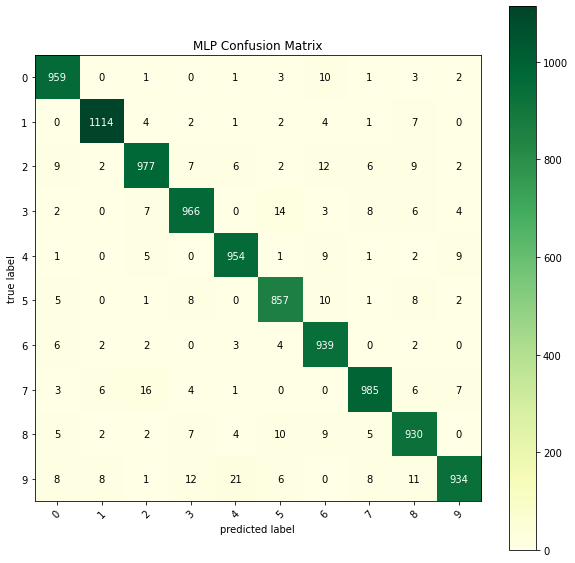

In [ ]:
cm = confusion_matrix(y_true, y_pred)
classes = list(map(lambda x: str(x), range(10)))

fig, ax = plot_confusion_matrix(conf_mat=cm, colorbar=True, class_names=classes, figsize=(10, 10), cmap='YlGn')
ax.set_title("MLP Confusion Matrix")
plt.show()

#### Acurácia por época

Gráfico da acurácia por época nos conjutos de validação e de treino.

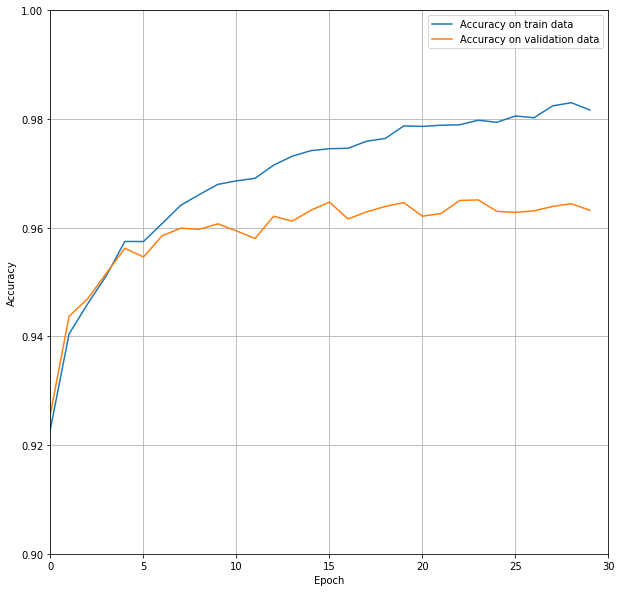

In [ ]:
plt.figure(figsize=(10,10))
ax1 = plt.subplot()
# make a little extra space between the subplots
fig.subplots_adjust(hspace=0.5)

t = list(range(30))
#x = t
#y = s1/s2
line1, = ax1.plot(t, train_acc, label='Accuracy on train data')

line2, = ax1.plot(t, val_acc, label='Accuracy on validation data')

ax1.set_xlim(0, 30)
ax1.set_ylim(0.9, 1)
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.grid(True)

ax1.legend()
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f9bcf13e-bf05-46ce-ab96-502b8a23123f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>